<a href="https://colab.research.google.com/github/teerasitk/01205415/blob/main/BrownianMotion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraryies

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Brownian motion

Properties of Brownian Motion $W(t)$

1.   $W(0) = 0$ almost surely
2.   $W(t+u)-W(t)$ is independent of $W(s)$ for $s < t$ and $ u >0$.
3.   $W(t)-W(s) \sim  N(0,|t-s|^2)$
4.   $W(t)$ is continous *in probability*



# Create one Brownian motion ensemble

## Specify time interval and time steps


1.   T = 1 year
2.   N = 1,000 steps
3.   dt = T/N = 1e-3 years
4.   $dW(t) = W(t+dt)-W(t) \sim  N(0,|dt|)$ or

 $dW(t) = Z(t) * \sqrt{dt}$

 where $Z(t)\sim N(0,1)$


For $t = m \times dt$, there are $dW(0), \ldots, dW\left((m-1) \times dt\right)$

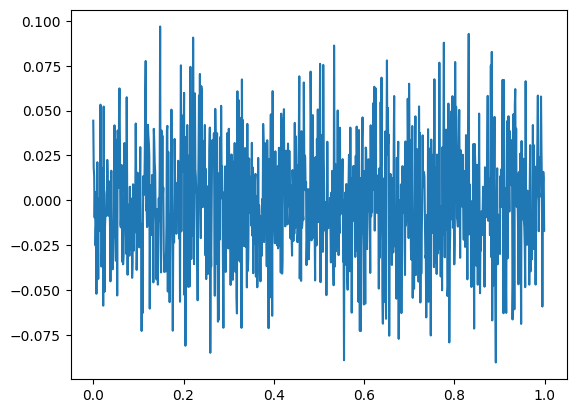

In [9]:
T = 1 # one year
N = 1_000 # 1,000 samples
dt = T/N
dW = np.random.standard_normal(size=(N-1, )) * np.sqrt(dt)
t = np.linspace(0, T-dt, N-1)
plt.plot(t, dW)

From 4, we have
1.    $W(dt) = W(0) + dW(0) = dW(0)$
2.    $W(2 \times dt) = W(dt) + dW(dt) = dW(0) + dW(dt)$
3.    $W(m \times dt) = W((m-1) \times dt) + dW(m \times dt) = \sum_{i=1}^{m} dW(i \times dt)$

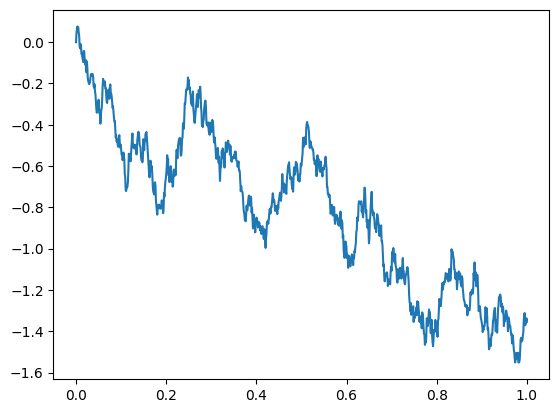

In [10]:
W = dW.cumsum()
W = np.concatenate(([0], W))
t = np.linspace(0, T, N)
plt.plot(t, W)

## Some properties of Brownian motion

1. $E\left[W(t)\left|W(s)\right.\right] = W(s)$
2. $E[dW] = 0$
3. $E[dW^2] = dt$
4. $E\left[dW^2(0) + \cdots + dW^2(T-dt) \right] = T$

Average of dW = -0.00136
Average of dW^2 = 0.00104 and dt =0.00100


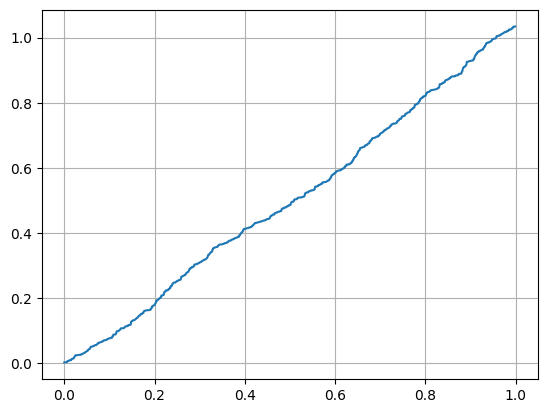

In [11]:
avg_dW = np.mean(dW)
avg_dW_square = np.mean(dW ** 2)
sum_dW_square = (dW ** 2).cumsum()
print(f"Average of dW = {avg_dW:0.5f}")
print(f"Average of dW^2 = {avg_dW_square:0.5f} and dt ={dt:0.5f}")
plt.plot(t[:-1], sum_dW_square)
plt.grid()

# Arthmetric Brownian Motion

$dX(t) = \alpha  dt + \sigma dW(t)$

# Simulate $X(t)$


## Specify time interval, time steps, $\sigma$, and $\alpha$


1.   T = 1 year
2.   N = 1,000 steps
3.   $\sigma=0.2$
4.   $\alpha=0.05$
5.   dt = T/N = 1e-3 years
6.   $dX(t) = X(t+dt)-X(t) \sim  N(\alpha dt,\sigma^2|dt|)$

$ dX(t)=\alpha dt  + Z(t) \times \sigma \times \sqrt{dt}$

where $Z(t) \sim N(0,1)$

For $t = m \times dt$, there are $dX(0), \ldots, dX\left((m-1) \times dt\right)$

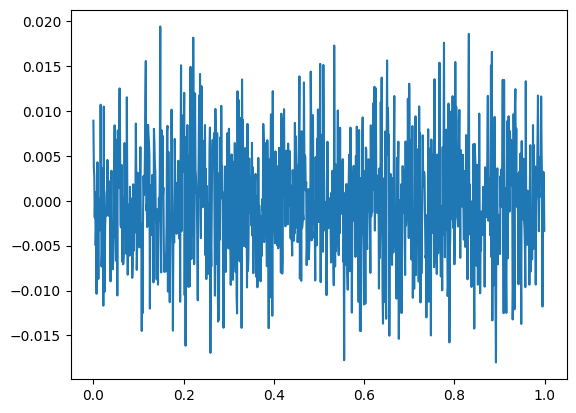

In [12]:
T = 1 # one year
N = 1_000 # 1,000 samples
sigma = 0.2
alpha = 0.05
dX = alpha * dt + sigma * dW
t = np.linspace(0, T-dt, N-1)
plt.plot(t, dX)

From above, we have
1.    $X(dt) = X(0) + dX(0) = dX(0)$
2.    $X(2 \times dt) = X(dt) + dX(dt) = dX(0) + dX(dt)$
3.    $X(m \times dt) = X((m-1) \times dt) + dX(m \times dt) = \sum_{i=1}^{m} dX(i \times dt)$

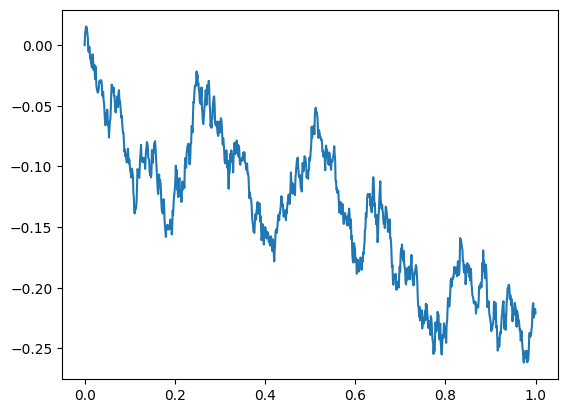

In [13]:
X = dX.cumsum()
X = np.concatenate(([0], X))
t = np.linspace(0, T, N)
plt.plot(t, X)

# Ito Lemma
If $X(t)$ is a continous time stochatic process with

$dX(t) = a(X) dt + b(X) dW(t)$

where $W(t)$ is a Brownian Motion

For a differential function $G(X,t)$, we have

$dG(t)=\left[\frac{\partial G }{\partial t} + a(X) \frac{\partial G }{ \partial X} + \frac{1}{2} b^2(X) \frac{\partial^2 G}{\partial X ^2}\right] dt + b(X) \frac{\partial G }{\partial X} dW $


## Example
For
$dX(t) = \alpha dt + \sigma dW(t)$

and  

$P(X,t)=e^{X}$,

we have



*   $a(X) = \alpha$
*   $b(X) = \sigma$
*   $\frac{\partial P}{\partial t} = 0$
*   $\frac{\partial P}{\partial X} = e^X = P$
*   $\frac{\partial^2 P}{\partial X^2} = e^X = P$.

This results leads to

$dP(t) = \left[\alpha + \frac{1}{2} \sigma^2 \right] P dt + \sigma P dW(t) $





## Specify time interval, time steps, $\sigma$, and $\alpha$


1.   T = 1 year
2.   N = 1,000 steps
3.   $\sigma=0.2$
4.   $\alpha=0.05$
5.   dt = T/N = 1e-3 years
6.   $dW(t) = W(t+ dt) - W(t) \sim N(0, |dt|)$  
7.   $dX(t) = X(t+dt)-X(t) \sim  N(\alpha\times dt,\sigma^2|dt|)$
8.   $P = e^X$
9.   $dP(t) = P(t+ dt) - P(t)$


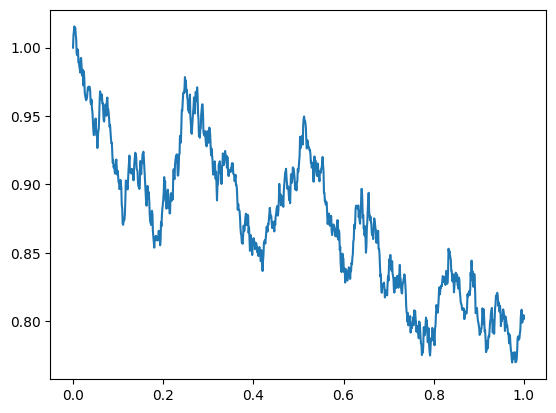

In [22]:
P = np.exp(X)
plt.plot(t, P)

6.163793959656759e-10


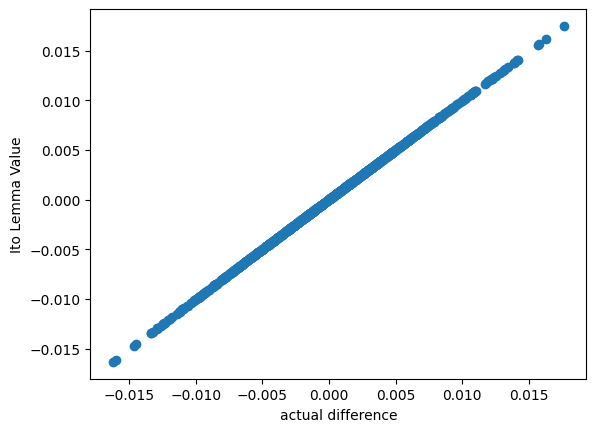

In [21]:

dP = P[1:] - P[:-1]
dP_ito = (alpha  + 0.5 * sigma ** 2) * P[:-1] * dt + sigma * P[:-1] * dW
plt.scatter(dP, dP_ito)
plt.xlabel("actual difference")
plt.ylabel("Ito Lemma Value")
print(np.mean((dP- dP_ito) **2) )

# Binary Option

There are some setup


1.   $T = 3$ months to maturity
2.   $K=100$
3.   Payoff $C_B(P_T) = 1$ if $P_T >K$ and 0 otherwise
4.   $P_{0} = 100$
5.   $\sigma = 0.2$
6.   $\mu = 0.05$
7.   Time step $N = 1000$
8.   Number of paths $M = 100$

Here,

$dP_t = \mu P_t dt + \sigma P_t dW_t$


### Build ensembles

In [72]:
T = 3/12
N = 1_000
M = 100
K = 100
dt = T / N
r = mu = 0.05
sigma = 0.2
P0 = 100
z = np.random.standard_normal(size=(N, M))
dW = z * np.sqrt(dt)
dX = (mu -0.5 * sigma ** 2 ) * dt + sigma * dW
X = dX.cumsum(0) # sum over dimension 0
X = np.concatenate((np.zeros((1, M)), X))
P = P0 * np.exp(X)

Plot ensembles

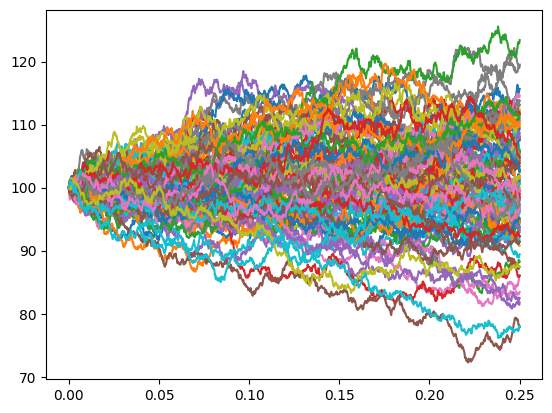

In [73]:
t = np.linspace(0, T, N+1)
for m in range(M):
  plt.plot(t, P[:, m])

### Each path payoff

In [74]:
payoff = (P[-1, :] > K).astype('float')
print(payoff)

[1. 1. 0. 1. 1. 0. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0.
 1. 1. 1. 0. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0.
 1. 0. 0. 0. 1. 1. 1. 0. 0. 1. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0.]


### Compute average payoff and discounted payoff

In [75]:
avg_payoff = payoff.mean()
discounted_payoff = avg_payoff * np.exp(-r * T)
print(f"Average Payoff at T: {avg_payoff:0.3f}")
print(f"Discounted Payoff at 0: {discounted_payoff:0.3f}")

Average Payoff at T: 0.510
Discounted Payoff at 0: 0.504


### Binary option formula

$C_B(P_t) = e^{-r \tau} \Phi(d_2)$

where

$d_2 = \frac{1}{\sigma \sqrt{\tau}}\left(\log\frac{P_t}{K} + \left(r - \sigma^2/2\right)\right)$

In [76]:
d2 = (np.log(P0/K) + (r - 0.5 *sigma ** 2) * T)
d2 = d2/(sigma * np.sqrt(T))
CB = np.exp(-r * T) * norm.cdf(d2)
print(CB)

0.523310211911645


# Call and Put European Option

## Payoff function



1.   Call Option: $\max(P_T-K,0)$
2.   Put Option:  $\max(K-P_T,0)$



## Option Pricing using Black-Sholes Fomula

*  Call Option Valu at $t$: $C_C(P_t, t) = P_t \Phi(d_1) - K e^ {-r \tau}\Phi(d_2)$
*  Put Option Valu at $t$: $C_P(P_t, t) = K e^ {-r \tau}\Phi(-d_2)- P_t \Phi(-d_1)$

where



*   $\tau = T-t$
*   $d_1 =  \frac{\log(P_t /K) + (r + \sigma^2/2)\tau}{\sigma \sqrt{\tau}}$
*   $d_2 =  \frac{\log(P_t /K) + (r - \sigma^2/2)\tau}{\sigma \sqrt{\tau}}$




### Simulated value


Both Call and put options have the same strike price $K=P_0=100$




#### Call Option

In [77]:
payoff_call = (P[-1, :] -  K) * (P[-1, :] > K)
print("============== call Option=================")
print(payoff_call)
payoff_put = (K - P[-1, :] ) * (P[-1, :] < K)
print("============== put Option=================")
print(payoff_put)

============== call Option=================
[ 2.51785346  0.77784684 -0.          0.65975989 11.79214894 -0.
 -0.         19.51173868 12.16662267  8.03688563 -0.         -0.
  7.74845118 11.86587028  5.52797929  7.85838166 -0.         -0.
  3.62952863 -0.          9.42437771  1.95017872  4.83688774 -0.
 -0.         -0.          0.57122534 19.29341836  4.14673413  5.82074095
 -0.         10.0882485  -0.         -0.          5.03521833  4.33032249
  7.47244323 13.18044218 -0.         -0.         11.52589804 -0.
 -0.          3.88952864 -0.         -0.         -0.         -0.
 12.39886829  0.6876456   7.56308763 -0.          2.48123473 -0.
 -0.          3.34675214 -0.         13.76239158 -0.          4.78894672
 15.65599708 -0.         -0.         11.5932784  -0.         -0.
 -0.          8.63958029 10.0309749  -0.          1.12208324 -0.
 23.39137502 -0.         -0.         -0.         14.59253033  5.78142293
  1.8485489  -0.         -0.         10.59014251  5.83759766 -0.
  7.84770101 -

In [78]:
avg_payoff_call = payoff_call.mean()
discounted_payoff_call = avg_payoff_call * np.exp(-r*T)
print(f"Simulated Call Option Value at t=0: {discounted_payoff_call:0.3f}")


avg_payoff_put = payoff_put.mean()
discounted_payoff_put = avg_payoff_put * np.exp(-r*T)
print(f"Simulated Put Option Value at t=0: {discounted_payoff_put:0.3f}")

Simulated Call Option Value at t=0: 3.972
Simulated Put Option Value at t=0: 3.211


### Theretical Values

In [79]:
d1 = np.log(P0/K) + (r + 0.5 * sigma **2) * T
d1 = d1 / (sigma * np.sqrt(T))

d2 = np.log(P0/K) + (r - 0.5 * sigma **2) * T
d2 = d2 / (sigma * np.sqrt(T))

C_call = P0 * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
print(f"Theretical Call Option Value at t=0: {C_call:0.3f}")

C_put = K * np.exp(-r*T)*norm.cdf(-d2) - P0*norm.cdf(-d1)
print(f"Theretical Put Option Value at t=0: {C_put :0.3f}")

Theretical Call Option Value at t=0: 4.615
Theretical Put Option Value at t=0: 3.373


# Hedging Derivative


When a finanicial institute inssues an option, it must hedge against the risk to nullify the effect of prices onto the portfolio values

## Delta Hedge

$\Delta$ is define as

$\Delta = \frac{\partial C}{\partial P_t}$

which is the rate of change of the derivative price with respect to the asset price.

In this case, the porfilo contains



1.   One contact of derivative (Options)
2.   Short $h$ shares of the underlying asset of the derivative

Value of the portfolio is given as

$\mathcal{V} = C_t  - h\times P_t$

The goal is to find $h$ such that

$\frac{\partial \mathcal{V}}{P_t} = 0$

## Hedge Simulation

### Install yfinance

In [2]:
!pip install yfinance

### Import yfinance

In [3]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


### Setup
In this simulation, we will try to perform the Delta Hedge on a Call Option on an SET50 Index.

We will use the derivative Warrant (DW) SET5013C2403E with following info


1.   $t_0$ = 2023-12-14
2.   $T$ = 2024-04-02
3.   $K$ = 975
4.   Multiplier = 0.1111 (THB/ Points)
5.   N = 32,534,900 contacts sold.




<ipython-input-4-8fe4bce68c50>:1: FutureWarning: Inferring datetime64[ns] from data containing strings is deprecated and will be removed in a future version. To retain the old behavior explicitly pass Series(data, dtype=datetime64[ns])
  dw_prices = pd.read_excel("set50DWExample.xlsx")


<Axes: xlabel='Date'>

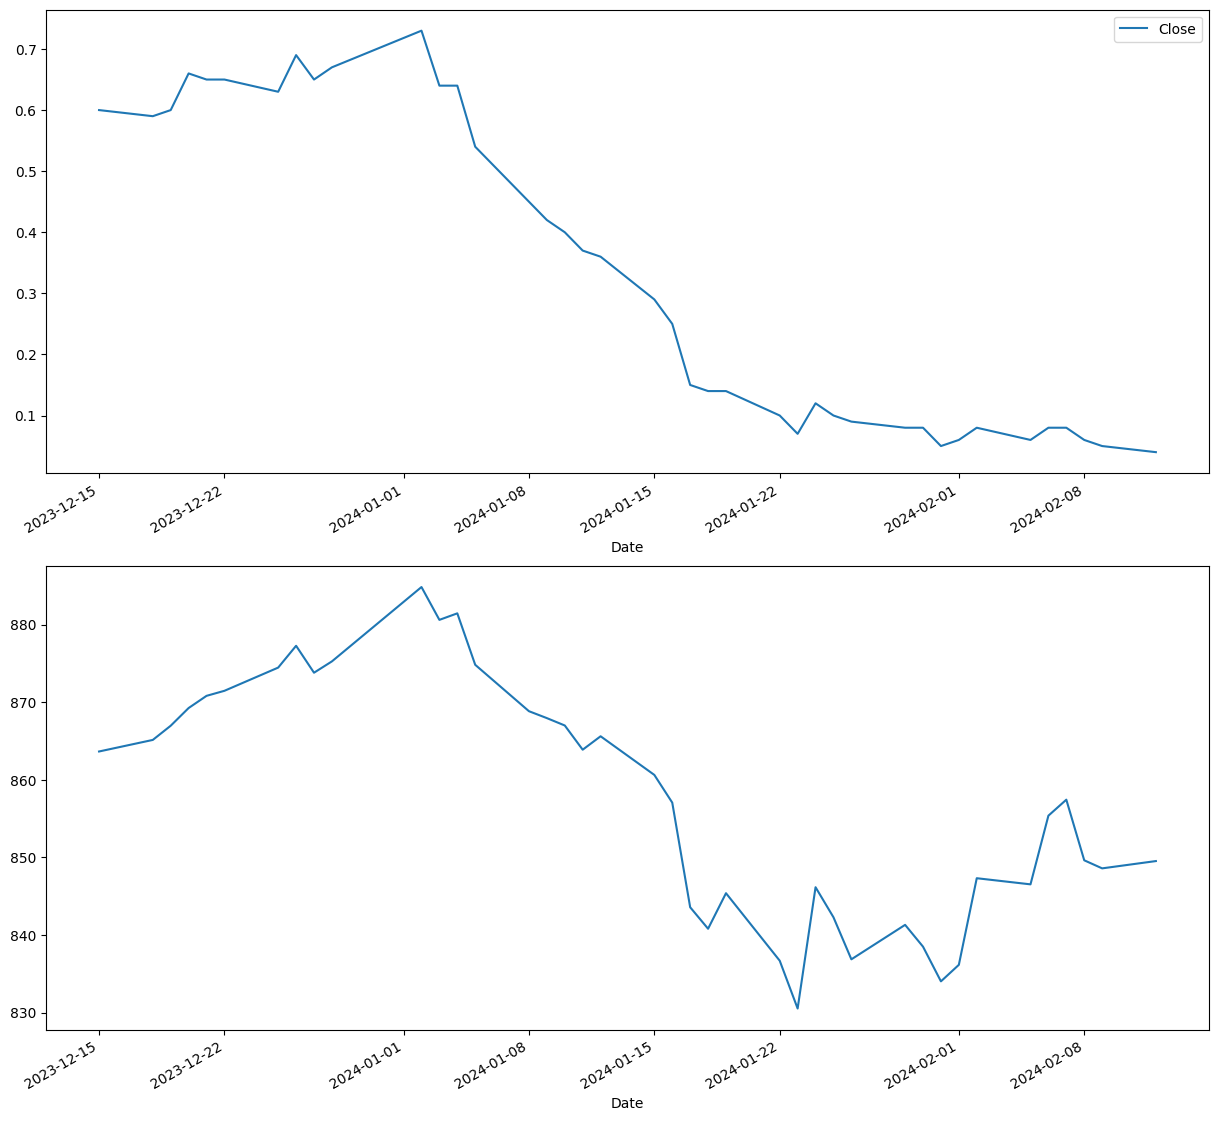

In [4]:
dw_prices = pd.read_excel("set50DWExample.xlsx")
dw_prices = dw_prices.set_index("Date")

set50_index = pd.read_excel("set50Index.xlsx")
set50_index = set50_index .set_index("Date")
fig,  axes = plt.subplots(nrows=2, ncols=1, figsize=(15,15))
dw_prices.plot(ax=axes[0])
set50_index.Close[dw_prices.index].plot(ax=axes[1])

The theoritical value for a Call Option is given as


$C_C(P_t, t) = P_t \Phi(d_1) - K e^ {-r \tau}\Phi(d_2)$


where



*   $\tau = T-t$
*   $d_1 =  \frac{\log(P_t /K) + (r + \sigma^2/2)\tau}{\sigma \sqrt{\tau}}$
*   $d_2 =  \frac{\log(P_t /K) + (r - \sigma^2/2)\tau}{\sigma \sqrt{\tau}}$


In [5]:
set50_index.index[0]

Timestamp('2019-09-13 00:00:00')

In [6]:
T = dt.datetime(year=2024, month=4, day=2) #T = 2024-04-02
t0 = dw_prices.index[0]
tau = (T- t0).days
P0 = set50_index.Close[t0]
K = 975
r = 0.02 # 2% fixed-free interest
multiplier = 0.1111
print(f"time to maturity: {tau:d}")
print(f"P0: {P0:0.2f}")
print(f"K: {K}")


time to maturity: 109
P0: 863.64
K: 975


### estimate volatility from the historical data

Here, we use historical 90 days

In [7]:
N_trading_day_per_year = 250 # 250 trading days per year
dd = dt.timedelta(days =90)
t_min_90 = t0 - dd
hist_values = set50_index.Close[t_min_90:t0]
log_ret = np.log(hist_values.pct_change(1) + 1)
log_ret = log_ret.dropna()
sigma = log_ret.std(ddof=1)
annum_sigma = sigma * np.sqrt(N_trading_day_per_year ) # annulaized
print(f"Vol: {annum_sigma :0.3f}")

Vol: 0.144


In [8]:
tau_year = tau / N_trading_day_per_year # change unit to year
d1 = np.log(P0/K) + (r + 0.5* annum_sigma ** 2) * tau_year
d1 = d1 / (annum_sigma * np.sqrt(tau_year))

d2 = np.log(P0/K) + (r - 0.5* annum_sigma ** 2) * tau_year
d2 = d2 / (annum_sigma * np.sqrt(tau_year))

Gc = P0 * norm.cdf(d1) - K * norm.cdf(d2) * np.exp(-r * tau_year)
print(f"Option Price without multiplier: {Gc:0.3f}")
dw_th_price = Gc * multiplier
print(f"Option Prive with multiplier: {dw_th_price :0.3f}")
print(f"Option Actual Trading Price with multiplier: {dw_prices.Close.iloc[0]:0.3f}")

Option Price without multiplier: 5.071
Option Prive with multiplier: 0.563
Option Actual Trading Price with multiplier: 0.600


### Delta Hedge one time

In [9]:
delta0 = norm.cdf(d1) * multiplier
print(f"We will need to buy {delta0: 0.4f} shares of set50 index to hedge against the risk")

We will need to buy  0.0143 shares of set50 index to hedge against the risk


###  The portfolio contains:



1.   N=32,534,900 Short contacts of DW
2.   0.0143 x 32,534,900 shares of set50 index






Text(0.5, 1.0, 'Portfolio Value')

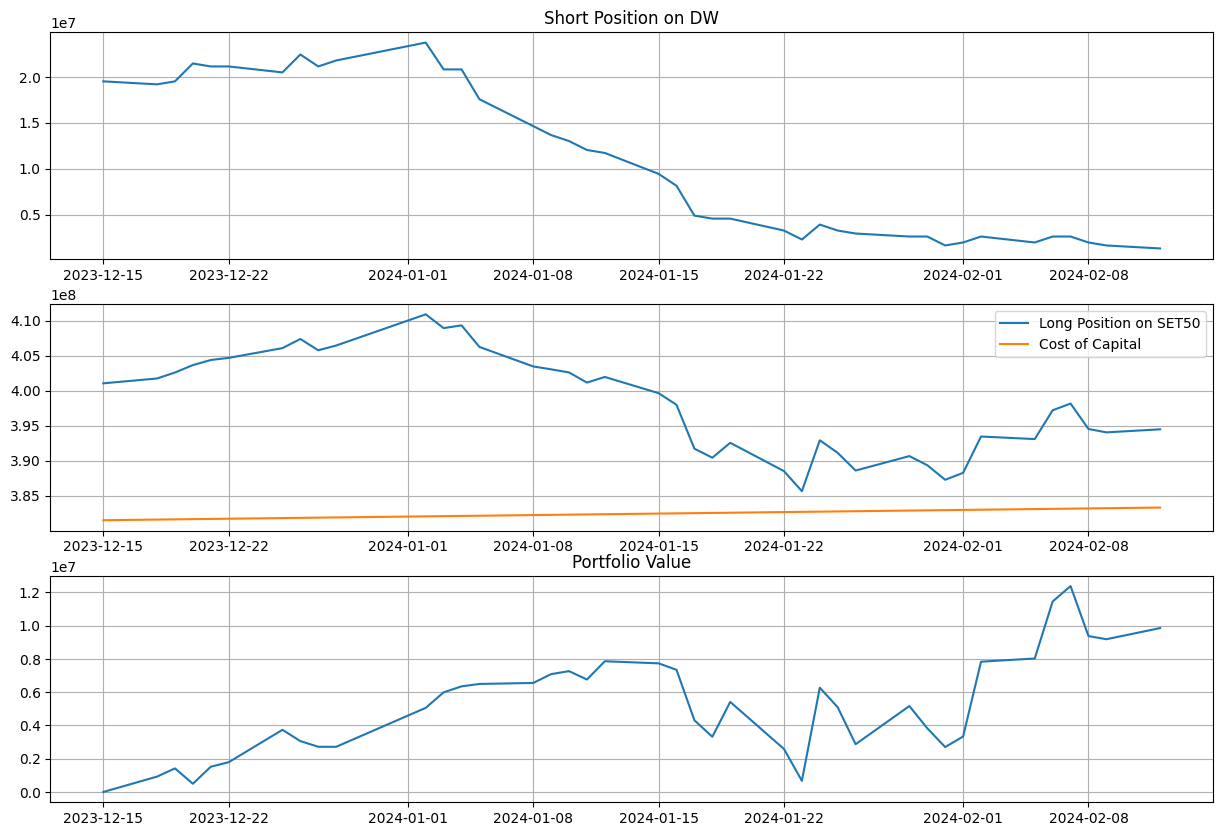

In [23]:
N = 32_534_900
short_position = N * dw_prices.Close # short positiion on DW
long_position =  delta0 * N * set50_index.Close[dw_prices.index] # long on set50
init_loan = long_position.iloc[0] - short_position.iloc[0] # Loan money for hedge
num_days_from_t0 = (dw_prices.index - dw_prices.index[0]).days # number of trading days
capital_cost  = init_loan  *  np.exp(r*num_days_from_t0/N_trading_day_per_year)
# loan grow over time
capital_cost = pd.Series(data=capital_cost, index=dw_prices.index) # change to pandas series
portfolio_value = long_position - capital_cost - short_position
# portfolio contain long on set 50 index, loan and short position on DW
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(short_position)
plt.title("Short Position on DW")
plt.grid()
plt.subplot(3,1,2)
plt.plot(long_position , label="Long Position on SET50")
plt.plot(capital_cost, label="Cost of Capital" )
plt.legend()
plt.grid()
plt.subplot(3,1,3)
plt.plot(portfolio_value)
plt.grid()
plt.title("Portfolio Value")

In [27]:
print("To build the portfolio, we must initially")
print(f"      Short position on DW: {short_position.iloc[0]:,.2f}")
print(f"      Long position on SET50 index: {long_position.iloc[0]:,.2f}")
print(f"      Loan: {init_loan:,.2f}")

print(f"The value of portfolio changes by {np.abs(portfolio_value).max():,.2f}")

To build the portfolio, we must initially
      Short position on DW: 19,520,940.00
      Long position on SET50 index: 401,049,933.29
      Loan: 381,528,993.29
The value of portfolio changes by 12,382,629.54


### End of the day Hedging

We compute the Delta Hedge position at the end of each day, and adjust portfolio accordingly.

In [31]:
def computeVol(date0, hist_dates = 90):
  dd = dt.timedelta(days =hist_dates )
  t_min_hist = date0 - dd
  hist_values = set50_index.Close[t_min_hist:date0]
  log_ret = np.log(hist_values.pct_change(1) + 1)
  log_ret = log_ret.dropna()
  sigma = log_ret.std(ddof=1)
  annum_sigma = sigma * np.sqrt(N_trading_day_per_year ) # annulaized
  return annum_sigma

def computeDelta(tau, P0, K, r, annum_sigma, multiplier=1):
  tau_year = tau / N_trading_day_per_year # change unit to year
  d1 = np.log(P0/K) + (r + 0.5* annum_sigma ** 2) * tau_year
  d1 = d1 / (annum_sigma * np.sqrt(tau_year))
  delta = norm.cdf(d1) * multiplier
  return delta

In [71]:
N = 32_534_900
loan = []
short_dw_contact  = []
long_set50_shares = []
port_values = []
current_long_position = 0
current_loan = 0
current_port_value = 0
for cnt, date in enumerate(dw_prices.index): # cnt for index of each date
  vol = computeVol(date0=date)   # compute historical vol of set50 index
  short_pos = N # number of DW contacts
  dw_price = dw_prices.Close[date] # current DW prices
  total_dw_value = short_pos * dw_price # total DW values to payback to customer
  tau_date = (T- date).days # number of days to maturity

  P_date = set50_index.Close[date] # current set50 index value
  delta_date = computeDelta(tau=tau_date,  # compute current Delta of DW
                            P0= P_date,
                            K=K,
                            r=r,
                            annum_sigma=vol,
                            multiplier=multiplier)
  target_position = N * delta_date # number of set50 index to have in the portfoloio
  additional_shares = target_position - current_long_position # additional shares to buy or sell
  if cnt == 0: # received money from selling DW on the first date.
    cost_of_shares = target_position * P_date
    additional_loan = cost_of_shares - total_dw_value # we get money from customer
  else:
    additional_loan = additional_shares * P_date
  current_loan = current_loan * np.exp(r/N_trading_day_per_year) # one day interest
  current_loan += additional_loan
  loan.append(current_loan)
  long_set50_shares.append(target_position * P_date)
  short_dw_contact.append(short_pos * dw_price)
  current_port_value = target_position * P_date - total_dw_value - current_loan
  port_values.append(current_port_value)
  current_long_position = target_position

port_values = pd.Series(data=port_values, index=dw_prices.index)
loans = pd.Series(data=loan, index=dw_prices.index)
long_set50_shares = pd.Series(data=long_set50_shares , index=dw_prices.index)
short_dw_contact = pd.Series(data=short_dw_contact, index=dw_prices.index)


Text(0.5, 1.0, 'Portfolio Value')

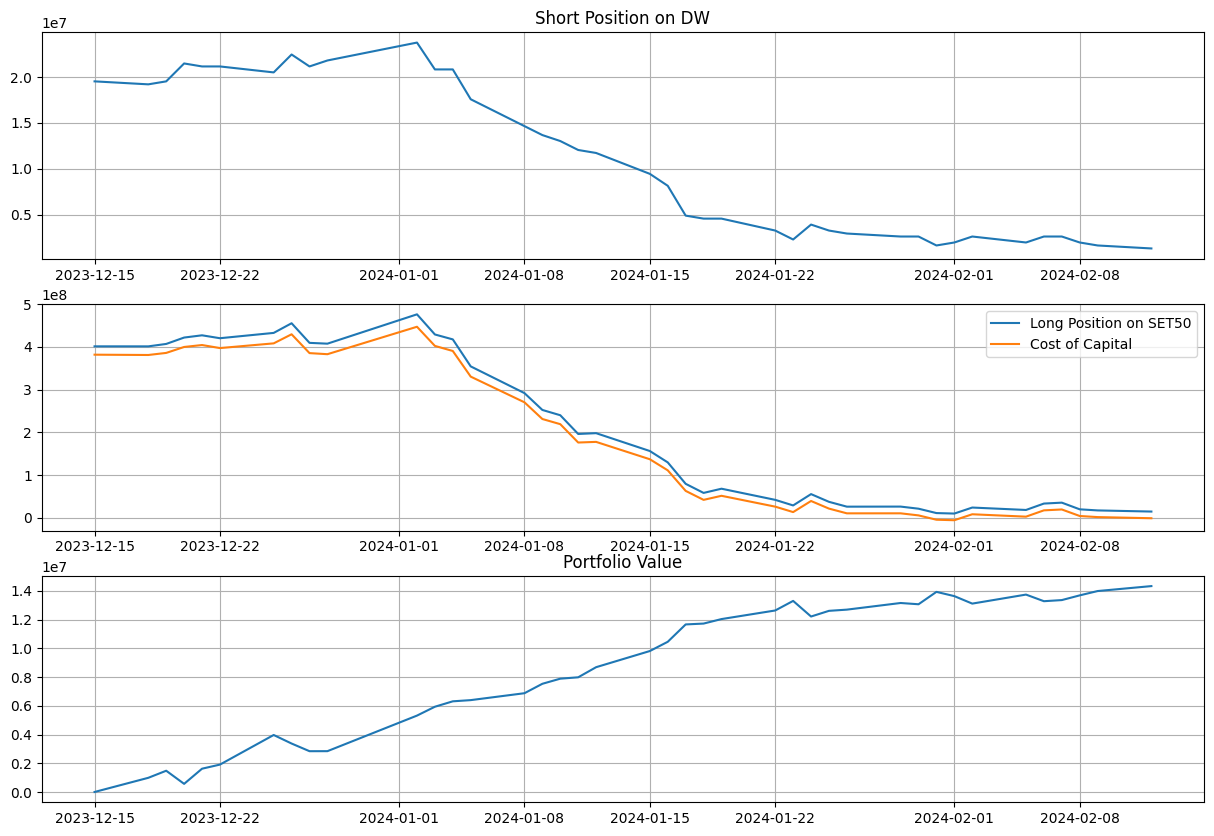

In [72]:
plt.figure(figsize=(15,10))
plt.subplot(3,1,1)
plt.plot(short_dw_contact)
plt.title("Short Position on DW")
plt.grid()
plt.subplot(3,1,2)
plt.plot(long_set50_shares , label="Long Position on SET50")
plt.plot(loans, label="Cost of Capital" )
plt.legend()
plt.grid()
plt.subplot(3,1,3)
plt.plot(port_values )
plt.grid()
plt.title("Portfolio Value")

In [69]:
short_dw_contact

[19520940.0,
 19195591.0,
 19520940.0,
 21473034.0,
 21147685.0,
 21147685.0,
 20496987.0,
 22449081.0,
 21147685.0,
 21798383.0,
 23750477.0,
 20822336.0,
 20822336.0,
 17568846.0,
 14640705.0,
 13664658.0,
 13013960.0,
 12037913.0,
 11712564.0,
 9435121.0,
 8133725.0,
 4880235.0,
 4554886.0,
 4554886.0,
 3253490.0,
 2277443.0,
 3904188.0,
 3253490.0,
 2928141.0,
 2602792.0,
 2602792.0,
 1626745.0,
 1952094.0,
 2602792.0,
 1952094.0,
 2602792.0,
 2602792.0,
 1952094.0,
 1626745.0,
 1301396.0]